In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


In [109]:
data=pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


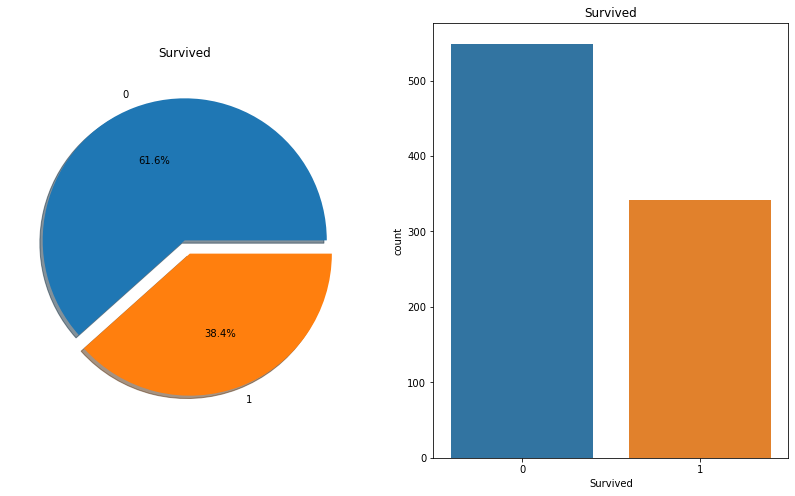

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

f,ax=plt.subplots(1,2,figsize=(14,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


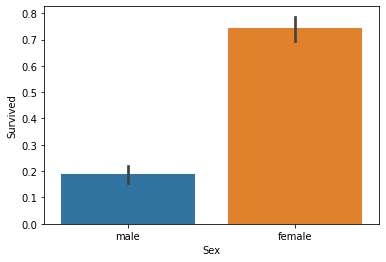

In [111]:
sns.barplot(x='Sex',y='Survived',data=data)
print('Percentage of females who survived:', data['Survived'][data['Sex']=='female'].value_counts(normalize=True)[1]*100)
print('Percentage of males who survived:', data['Survived'][data['Sex']=='male'].value_counts(normalize=True)[1]*100)

In [112]:
data=data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]


In [113]:
data.head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,NaN,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [114]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Sex']=label_encoder.fit_transform(data['Sex'])

<ipython-input-114-d90b3c6ef9ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex']=label_encoder.fit_transform(data['Sex'])


In [115]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [116]:
data.dropna(subset=['Age'],how='all',inplace=True)


<ipython-input-116-5bba62840331>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Age'],how='all',inplace=True)


In [117]:
X=data.drop('Survived',axis=1)
y=data['Survived']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [119]:
model=XGBClassifier(max_depth=4, n_estimators=50)
model.fit(X_train,y_train)

[12:33:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [120]:
y_pred=model.predict(X_test)
predictions=[round(value) for value in y_pred]

In [121]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' %(accuracy*100))

Accuracy: 84.36%
